# Gender Identification of English Twitter Users Using Deep Learning

group 18

## Abstract

This project elaborates and compares three of the models proposed for PAN 2017 Author Profiling Shared Task. Out of the subtasks proposed in this competition, we decided to focus our work on gender identification of English twitter users.

The first approach to this problem consisted of using a Deep Averaging Network (DAN) to perform the classification. We developed three alternatives of this model, and investigated both the model performance and the effects of adding more layers to the model. The best accuracy achieved with this solution was 57.95%.

For our second approach we implement a word level Multi-channel CNN and LSTM model and achieve an accuracy of 57%.

Finally, we implement a Attention Mechanism and Bidirectional RNN based model with the objective of focusing in certain areas of the sequence that could predict better. This model obtained the highest result in accuracy 61.58% from this exercise.

This work concludes Deep Learning methodologies with similar architectures are not the best models to predict gender from tweets. 

# Introduction

One of the main problems that have arisen with social media is that these platforms may allow users to hide their real profile and activities. As a consequence, many fields, such as marketing, security and healthcare are studying and developing models that can infer users' traits from their social media activity (Rangel et al, 2017).
 
Every year, the Uncovering Plagiarism, Authorship, and Social Software Misuse1 (PAN) evaluation lab proposed a shared task on Author Profiling at the Conference and Labs of the Evaluation Forum (CLEF). Author profiling aims at identifying the authors’ traits on the basis of their language shared by them (Franco-Salvador et al., 2017).
 
In 2017, the title of the task was “Gender and Language Variety Identification in Twitter”. Participants were provided with a dataset containing tweets written in four languages and labeled according to the gender of the authors, and were requested to develop models that could recognize language and gender traits in new tweets.

As part of our final project, we took advantage of the public dataset, competition informormation and results, to implement Deep Learning models that try achieve a high accuracy rate in gender prediction prediction. 

Although most of the participants in this task developed traditional machine learning models, such as SVMs and Logistic Regression, and these models were also the ones that achieved the best results, we only focused on models that involved neural networks in order to apply the knowledge we gained from this course.
 
Thus, we selected three of the Deep Learning proposed papers with different architectures. These solutions were then modified to make our final work consistent and allow comparisons between the results. The three approaches we implemented are the following:
- A Deep Averaging Network, inspired by the solution in (Franco-Salvador et al., 2017)
- A Convolutional Neural Networks, inspired by the solution in (Schaetti et al., 2017)
- A Bidirectional Recurrent Neural Network with an Attention Mechanism, inspired by the solution in (Kodiyan et al, 2017)
 
The solutions we present are trained to identify gender traits in tweets written only in English, but can be similarly trained to identify gender in other languages.


# 1. Problem 

## 1.2. Description and Analysis

The competition problem is as follows: given a text of maximum 280 characters in English create a model that can predict what was the gender of the person who wrote it.

For the purpose of analyzing the problem, lets define a variable $x_i \in \sum$ where $\sum$ are all the possible characters in twitter encoded in 8-bits (we exclude emojis). Then, we can define the concatanation $x_1x_2...x_{280}$  as the tweet. We call the space of all possible tweets $X$.
 Let's imagine each character of the tweets is generated randomly with equal weight for $\sum$. We claim this would generate a realization of tweets that would be unpredictable. The reason on the claim is true is the following:

By definition the characters, from a tweet, are drawn with equal probability. Then, if we measure Shannon Entropy (Shannon, 1948): $$ H=-\sum_{t \in X} p(t)log(p(t) $$ H would be the maximum possible in this situation because of the assumption of equal probability for all the space and, thus, as a consequence it is unpredictable.

Furthermore, in a situation where the Shannon Entropy of a tweet $t$ is the maximal we wont be able to build a probabilistic model to discern $Pr(Y=1| t )$ Vs $Pr(Y=0| t )$.

A conclusion of this analysis is that if the texts from dataset can predict gender with more than 50% accuracy, then the dataset wasn't drawn from a random process, i.e. there are patterns in the way the texts are generated and in order to be able to predict its gender there has to be a different pattern from the different genders.

There are several reason why men and women could have different ways of writing:
1) Intrinsic differences
2) External differences
3) or both.

Intrinsic differences would be due to biological differences, while external are drawn from the environment: such as culture, economic background etc. For instance, as noted by Wittgenstein language could work as a representation of how we think, and if thinking is shaped by our cultural, political and economic circumstances then language describes how we perceive our environment.


It is important to note that in this work we are not able to prove any hypothesis and assumptions about why could there be a prediction. The important aspect is: if it can be predicted then the message are not created with equal randomness. 






## 1.4. Dataset 

### 1.4.1 **Description**

The data was provided by the generous oragnizers of PAN CLEF 2017 who were kind enough to give us access to the original training and testing dataset along with the truth files used for judging the competition. We acknowledge their immense contribution to our cause without which this project would be impossible.  

Four test collections of tweets were created for the PAN CLEF 2017 evaluation campaign, one for each of the following languages: English, Spanish, Portuguese, and Arabic. As noted before, for our project, we work only with the English language.

Twitter was used to collect the training data. The texts for each tweet collection are written in the same language and are made up of 100 tweets from different authors. There are two labels we can predict for each author:

1. The gender of the author (male, female)
2. The language variety of the author, which is specific to the language

The English collection includes *3600* authors from six countries: the United States, the United Kingdom, Ireland, New Zealand, Australia, and Canada, with *600* for each gender and *1800* for each variety, totalling *360,000* tweets.

However, for our goal, we only use the gender attribute as the target attribute to be predicted and disregard the variety of the language.


### 1.4.2 **Data Cleaning**

Our methodology for preparing our data is as follows:

1. For each XML file containing *100* tweets per author, extract the metadata and merge with the truth files stored in a separate file. Shuffle the dataset and save it.
2. Next, for each of the tweets in our database we remove the stopwords (for ex. words like "a", "the", "for", "some" etc.) using the standard nltk library.
3. Drop instances with NA values
4. Remove any user identifiers like their usernames/ twitter handles
5. Remove links, hashtag symbol and other special symbols like emojis from the raw text.


### 1.4.3 **Preprocessing**

While every model we base our work on have thier own rules of preprocessing, we utilized a single method to maintain uniformity of input across our approach. The steps involved in preprocessing is as follows -

1. Apply keras preprocessing of text_to_word_sequence to the raw text
2. Define a tokenizer and fit it on the text obtained from prevous step
3. Calculate the length of our dictionary 
4. Use text_to_sequences from keras library to generate numeric sequences of our tweets
5. Finally, apply padding of size 50 to our sequences to maintain a common size of input to our models. The size 50 was chosen because the maximum words in a given tweet in our database was 36, and we rounded it up to 50 incase any tweet exceeds that length in our test dataset (which would be difficult since twitter has a character limit of 280 per tweet).

In [ ]:
#IMPORTS
import re, nltk
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive, files
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from pickle import load
from numpy import array
from nltk.corpus import stopwords
from keras.utils.vis_utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input , Dense, Flatten, Dropout, Embedding
from keras.layers import CuDNNLSTM, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [ ]:
drive.mount('/content/drive')
path = 'drive/MyDrive/Project/'

Mounted at /content/drive


In [ ]:
nltk.download('stopwords')
stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def obtain_silver_dataset(language, train_mode):
  df = pd.read_csv(path+f"Silver/{train_mode}-dataset-{language}.csv").sample(frac=1)
  return df


def remove_stopwords(df):
  '''
  Remove stop words downloaded from the nltk library from the given tweets
  '''
  df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_eng)]))
  return df

def pipline_dataset(df):  
  '''
  Cean the raw text, dropping NA values, removing stop words
  and applying the standard keras preprocessing for text data
  '''
  df["tweet"].dropna(inplace =  True)
  df = df.loc[df["tweet"].apply(lambda x: not isinstance(x, (float, int)))].copy()
  df = remove_stopwords(df)
  df["tweet"] = df["tweet"].map(tf.keras.preprocessing.text.text_to_word_sequence)

  return df

def obtain_golden_dataset(language, mode):
  df = pd.read_csv(path+f'Gold/{mode}-dataset-{language}-clean-words.csv').sample(frac=1)
  return df

def Tokenization(df):
  '''
  Tokenize, generate text sequence and apply padding on a given array of tweets
  '''
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(df.tweet)
  total_words = len(tokenizer.word_index) + 1
  print('Total words: ', total_words)
  input = tokenizer.texts_to_sequences(df.tweet)
  input = tf.keras.preprocessing.sequence.pad_sequences(input, maxlen=50, padding='post', truncating='post')


  return total_words, input, tokenizer

def clean_texts(tweet):
    '''
    Clean a given tweet by removing usernames, links and emojis
    '''
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",tweet)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]")
    tweet = re.sub(emoji_pattern, '', tweet)
    tweet = tweet.lower()
    return tweet



In [ ]:
def final_pipline(language,mode):
  df = obtain_silver_dataset(language, mode)
  df = pipline_dataset(df)
  df.to_csv(path+f'Gold/{mode}-dataset-{language}-clean-words.csv')

#Run this only if the GOLD dataset is not in the folder

# final_pipline("en" , "training")
# final_pipline("en", "test")

### 1.4.4 Final Dataset Analysis 

In [ ]:
df = obtain_golden_dataset("en", "training")

The training dataset contain equal number of tweets for both genders.

In [ ]:
df.label.value_counts() 

1    180000
0    180000
Name: label, dtype: int64

On averge men use more (non-stop) words in tweets than women. And, the distribution of both genders show women frequency distribution is more uniform.

In [ ]:
df["tweet_length"] = df.tweet.map(lambda x: len(x))

df[["sex","tweet_length"]].groupby("sex").mean()

,tweet_length
sex,
female,134.938828
male,137.058994


AxesSubplot(0.552174,0.15;0.347826x0.75)


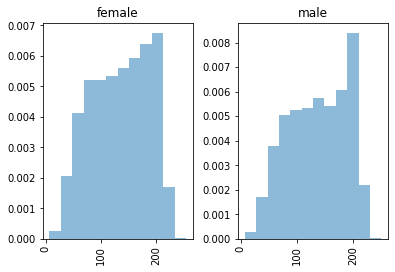

In [ ]:
temp = df[["sex","tweet_length"]].copy()
print(temp.hist(bins=12, alpha=0.5, by=df.sex, density = True)[1])



From a number of 18 million non-stop words we obtain tokens for 294,877 of them. 

In [ ]:
_, input, tokenization = Tokenization(df)

Total words:  408979


In [ ]:
words = pd.DataFrame(input.reshape((18000000,1)))

# 2. Solution

In this section, we present the models and analyse their performance and results

### Build Training and Testing Sets

In [ ]:
#Get the training set and tokenize it
df = obtain_golden_dataset("en", "training")
total_words, input, tokenizer = Tokenization(df)

Total words:  408979


In [ ]:
#Convert labels into categorical values
labels = tf.keras.utils.to_categorical(df.label.values)

In [ ]:
#Get the testing set
test = obtain_golden_dataset("en", "test")

In [ ]:
#Use the same tokenization of the training dataset
test_input = tokenizer.texts_to_sequences(test.tweet)
test_input = tf.keras.preprocessing.sequence.pad_sequences(test_input, maxlen=50,padding="post",truncating="post")

In [ ]:
#Convert labels into categorical values
test_labels = tf.keras.utils.to_categorical(test.label.values)

## 2.1. Deep Averaging Network 

The first model we decided to implement was inspired by the solution proposed in (Franco-Salvador et al., 2017). The model implemented by this team was ranked 10th in the competition. 

The idea is to solve the gender classification problem using a Deep Averaging Network (DAN). This model was first elaborated in the paper *"Deep Unordered Composition Rivals Syntactic Methods for Text Classification"* (Iyyer et al., 2015). 

The goal of the paper was to find a deep unordered model that could obtian near state-of-the-art accuracies on a variety of sentence and document-level tasks with just minutes of training time.

The model consists of the following steps (Iyyer et al., 2015):
1. Create embeddings associated with sequences of tokens
2. Average the vectors in each sequence embedding
3. Pass these values through a sequence of dense layers
4. Perform classification on the last layer


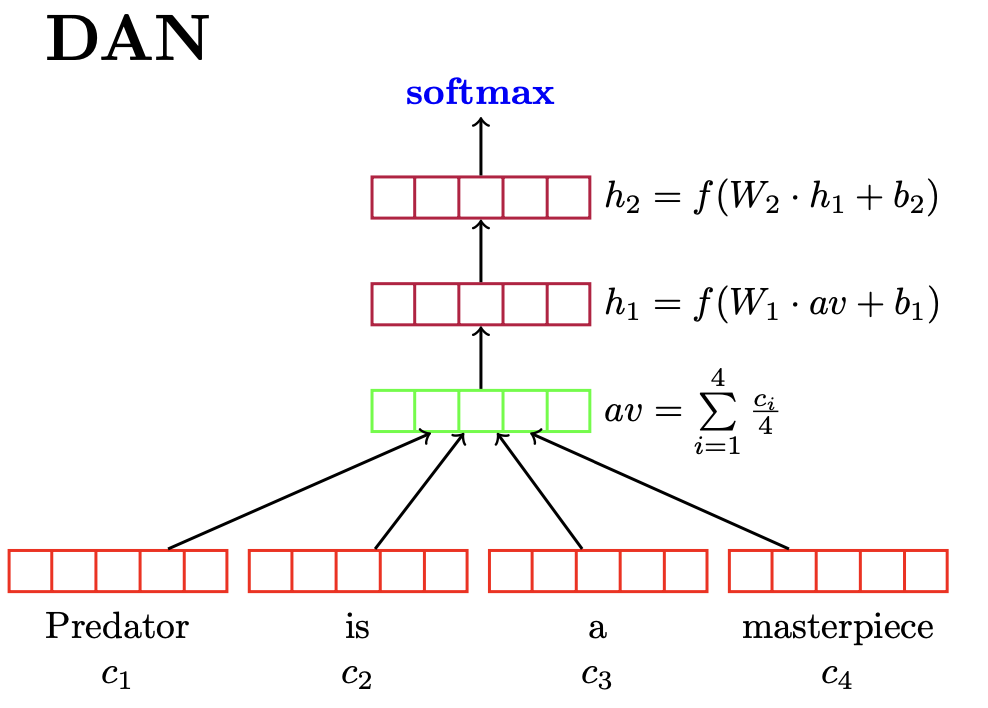

The main advantage of using this model is that, as it consists of simple vector operations and matrix multiplications. The complexity scales with the number of hidden layers.

### 2.1.1 Model

In the solution proposed in Franco-Salvador et al., 2017, the model is trained on the concatenation of all the tweets for each author. In order to be able to compare this model with the other two, we needed each tweet to be processed on its own. For this reason, we decided not to stricly follow the steps from this paper.

Here is a description of the layers we used: 

**1. Embedding Layer**

The embedding layer creates for each tokenized word in the input sequence a vector of size 300 (number proposed both in Iyyer et al., 2015 and Franco-Salvador et al., 2017). This layer is not trainable, as we do not want the embedded inputs to change while the algorithm runs.

**2. Word Dropout Layer**

The use of a dropout layer on the output of the embedding layer was proposed in Iyyer et al., 2015. The idea is that we drop some of the embedded words before computing the average, to avoid overfitting. 

**3. GlobalAveragePooling1D Layer**

This layer takes the embedded inputs and returns the average of the vectors. 

**4. Dense Layer/s**

One or many hidden layers are used to learn from the computed average. The number of nodes in all the fully connected layers is the same as the size of the average vector returned by the previous layer, in this case 300.

**5. Dropout Layer/s**

Dropout layers are used to reduce overfitting

**6. Softmax Layer**

Lastly, we added a Dense layer with 2 neurons using the softmax activation function. This layer performs the classification.

**7. Optimization** 

As in (Franco-Salvador et al., 2017), we use ADAM as the optimizer, with learning rate = 0.001.

**8. Training** 

We split the dataset in 80% training instances, 20% validation instances. The training is performed with the following parameters: epochs = 30, batch_size = 500, steps_per_epoch = 200


In [ ]:
def DAN(nHidden = 2, dropout = False, wordDropout = False):
  model = Sequential()
  model.add(Embedding(total_words,300,mask_zero=True,trainable=False))
  if wordDropout:
    model.add(Dropout(0.3))
  model.add(GlobalAveragePooling1D())
  for i in range(nHidden):
    model.add(Dense(300, activation = "relu")) 
    if dropout:
      model.add(Dropout(0.3)) 
  model.add(Dense(2, activation = "softmax"))
  model.summary()
  return model

In [ ]:
import matplotlib.pyplot as plt

Franco-Salvador's best model for gender recognition has 2 hidden layers, without Word Dropout.
Iyyer's best model has 3 hidden layers, with Word Dropout.

In the next sections, I will investigate how the number of hidden layers affects
the performance and results of the DAN, and I will compare DANs with no Dropout layes, one Dropout layer after each Dense layer, and DANs with Word Dropout layer.

### 2.1.2 DAN Without Dropout Layers

[There is a mistake in the output of the cells: 

I printed "Training DAN with i hidden and dropout layers"
While it should have been "Training DAN with i hidden layers"]


In [ ]:
accuraciesNoDropout = {}
bestAccNoDropout = 0.0

Training DAN with 0 hidden and dropout layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 2)                 602       
                                                                 
Total params: 122,694,302
Trainable params: 602
Non-trainable params: 122,693,700
_________________________________________________________________
The accuracy on the Testing Set is     0.5508


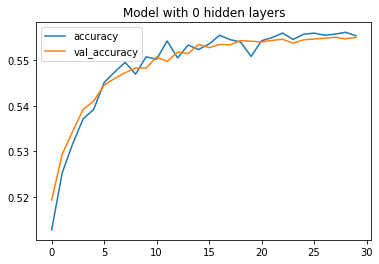

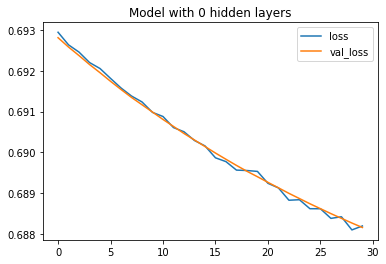

In [ ]:
i = 0 

print(f"Training DAN with {i} hidden layers")
print()

#Build and Train the Model
model = DAN(i, False, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)
#Plot the results
df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

#Get the Testing Accuracy
loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

#Save the best accuracy
if acc > bestAccNoDropout:
  bestAccNoDropout = acc

accuraciesNoDropout[i] = acc

Training DAN with 1 hidden and dropout layers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_1   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 2)                 602       
                                                                 
Total params: 122,784,602
Trainable params: 90,902
Non-trainable params: 122,693,700
_________________________________________________________________
The accuracy on the Testing Set is     0.5689


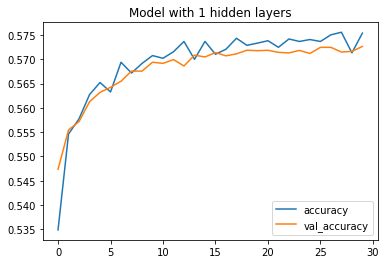

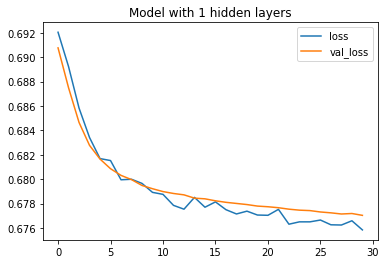

In [ ]:
i = 1

print(f"Training DAN with {i} hidden layers")
print()

#Build and Train the Model
model = DAN(i, False, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)
#Plot the results
df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

#Get the Testing Accuracy
loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

#Save the best accuracy
if acc > bestAccNoDropout:
  bestAccNoDropout = acc

accuraciesNoDropout[i] = acc

Training DAN with 2 hidden and dropout layers

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 2)                 602       
                                                                 
Total params: 122,874,902
Trainable params: 181,202
Non-trainable params:

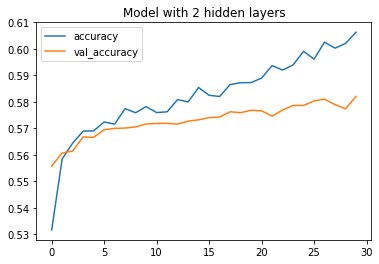

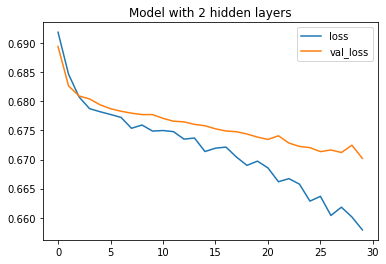

In [ ]:
i = 2

print(f"Training DAN with {i} hidden layers")
print()

#Build and Train the Model
model = DAN(i, False, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)
#Plot the results
df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

#Get the Testing Accuracy
loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

#Save the best accuracy
if acc > bestAccNoDropout:
  bestAccNoDropout = acc

accuraciesNoDropout[i] = acc

Training DAN with 3 hidden and dropout layers

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dense_8 (Dense)             (None, 300)               90300     
                                                                 
 dense_9 (Dense)             (None, 2)                 602       
       

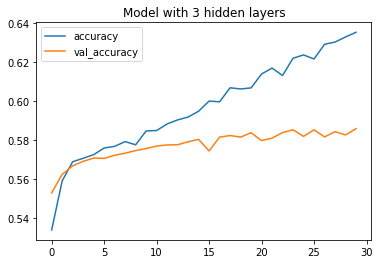

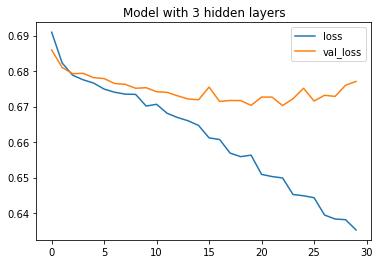

In [ ]:
i = 3

print(f"Training DAN with {i} hidden layers")
print()

#Build and Train the Model
model = DAN(i, False, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)
#Plot the results
df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

#Get the Testing Accuracy
loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

#Save the best accuracy
if acc > bestAccNoDropout:
  bestAccNoDropout = acc

accuraciesNoDropout[i] = acc

Training DAN with 4 hidden and dropout layers

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dense_13 (Dense)            (None, 300)               90300     
       

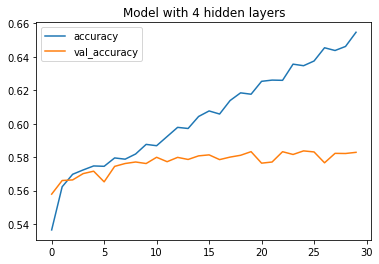

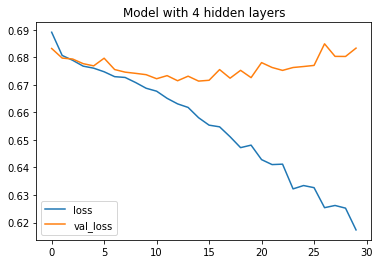

In [ ]:
i = 4

print(f"Training DAN with {i} hidden layers")
print()

#Build and Train the Model
model = DAN(i, False, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)
#Plot the results
df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

#Get the Testing Accuracy
loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

#Save the best accuracy
if acc > bestAccNoDropout:
  bestAccNoDropout = acc

accuraciesNoDropout[i] = acc

In [ ]:
print("The best accuracy achieved is: {0:10.4f}".format(bestAccNoDropout))

The best accuracy achieved is:     0.5755


**Comments**

The best accuracy is achieved when we add 2 hidden layers to the model, in which it reaches 57.55%.

However, the graphs point out that as we increase the number of hidden layers, the model begins overfitting earlier. 

In the first model, accuracy and validation loss are very similar and grow together. Moreover, the model seems to perform better on the validation model in the first 20 epochs. However, the accuracy on the test set for this model is the lowest. 

As the number of dense layers grows, the model performance on the validation set decreases. From the plots we see the more the layers, the earlier the validation loss starts to increase and the validation accuracy stops increasing. 

### 2.1.3 DAN With Dropout Layers

In this model, we add a dropout layer with probability p = 0.3 after each dense layer.

In [ ]:
accuracies = {}
bestAcc = 0.0

Training DAN with 0 hidden and dropout layers

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_5   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_15 (Dense)            (None, 2)                 602       
                                                                 
Total params: 122,694,302
Trainable params: 602
Non-trainable params: 122,693,700
_________________________________________________________________
The accuracy on the Testing Set is     0.5512


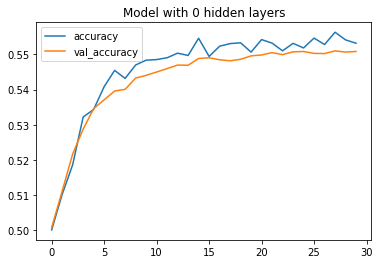

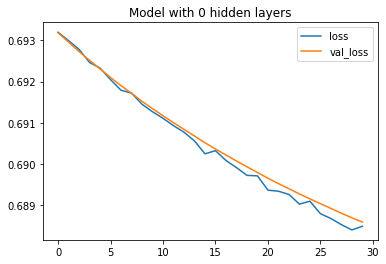

In [ ]:
i = 0 

print(f"Training DAN with {i} hidden and dropout layers")
print()
model = DAN(i,True, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAcc:
  bestAcc = acc

accuracies[i] = acc

Training DAN with 1 hidden and dropout layers

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_6   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 2)                 602       
                                                                 
Total params: 122,784,602
Trainable params: 90,902
Non-trainable params: 

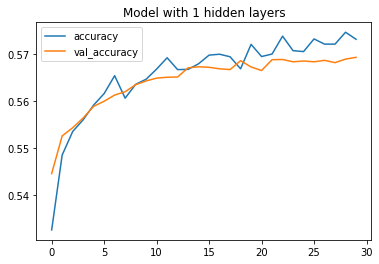

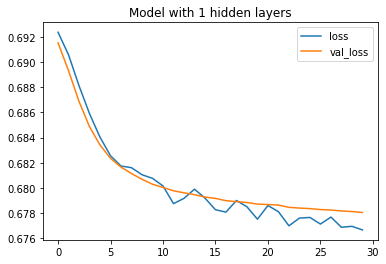

In [ ]:
i = 1

print(f"Training DAN with {i} hidden and dropout layers")
print()
model = DAN(i,True, False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAcc:
  bestAcc = acc

accuracies[i] = acc

Training DAN with 2 hidden and dropout layers

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_7   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_18 (Dense)            (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
       

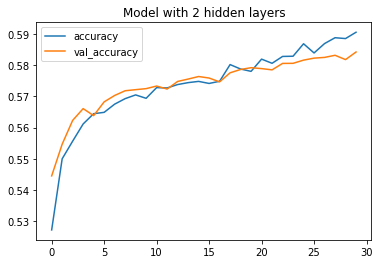

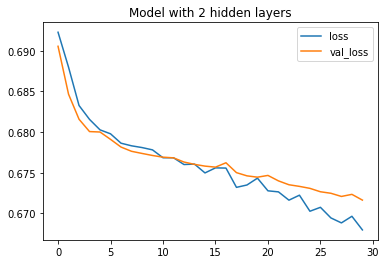

In [ ]:
i = 2

print(f"Training DAN with {i} hidden and dropout layers")
print()
model = DAN(i,True,False)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAcc:
  bestAcc = acc

accuracies[i] = acc

Training DAN with 3 hidden and dropout layers

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_8   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_21 (Dense)            (None, 300)               90300     
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_22 (Dense)            (None, 300)               90300     
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
       

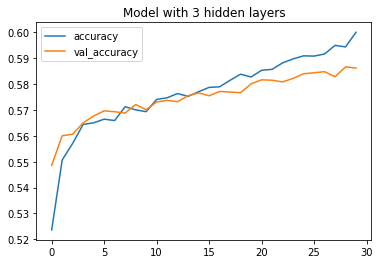

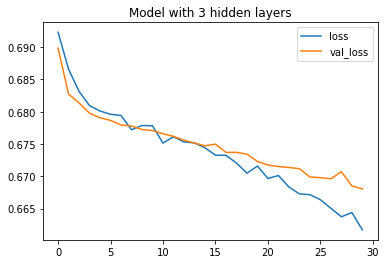

In [ ]:
i = 3

print(f"Training DAN with {i} hidden and dropout layers")
print()
model = DAN(i,True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAcc:
  bestAcc = acc

accuracies[i] = acc

Training DAN with 4 hidden and dropout layers

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 300)         122693700 
                                                                 
 global_average_pooling1d_9   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_25 (Dense)            (None, 300)               90300     
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_26 (Dense)            (None, 300)               90300     
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
       

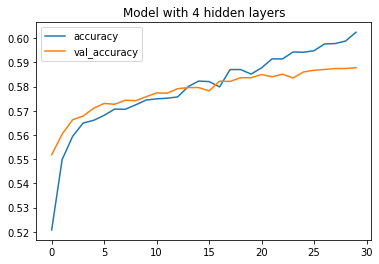

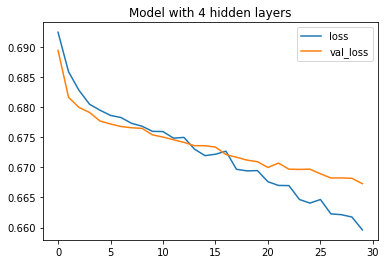

In [ ]:
i = 4

print(f"Training DAN with {i} hidden and dropout layers")
print()
model = DAN(i,True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAcc:
  bestAcc = acc

accuracies[i] = acc

In [ ]:
print("The best accuracy achieved is: {0:10.4f}".format(bestAcc))

The best accuracy achieved is:     0.5795


The Dropout layer clearly impacted the performance of the model.

The main difference can be seen on the models with 2 or more hidden layers. When nHidden = 2, the highest training accuracy is lower than the one achieved by the previous model, and the lowest loss is higher thank the previous one. However, the two plots show that training and validations trends are more similar compared to the previous ones, suggesting that this model is better at generalizing. 

The models with 3 and 4 layers still overfit the training set, however, this time, the overfitting happens after more epochs, compared with the previous two models. 

Overall, this model performs better then the one with no Dropout Layer, as we expected.

The highest accuracy achieved was 57.95, when we train the model with 4 Dense layers and 4 Dropout layers

### 2.1.4 Train with Word Dropout layer: p = 0.3

In [ ]:
accuraciesWordDropout = {}
bestAccWD = 0.0

Training DAN with a WORD dropout layer and 0 hidden layers

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 300)         122693700 
                                                                 
 dropout_18 (Dropout)        (None, None, 300)         0         
                                                                 
 global_average_pooling1d_16  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_42 (Dense)            (None, 2)                 602       
                                                                 
Total params: 122,694,302
Trainable params: 602
Non-trainable params: 122,693,700
_________________________________________________________________
The accuracy on the Testing Set is     0.55

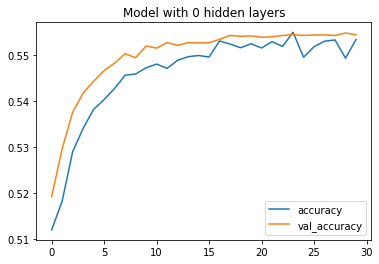

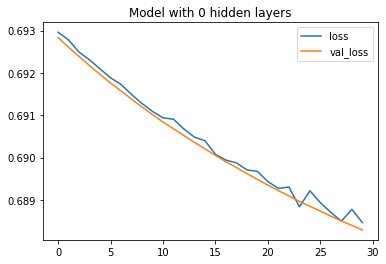

In [ ]:
i = 0

print(f"Training DAN with a WORD dropout layer and {i} hidden layers")
print()
model = DAN(i,False, True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAccWD:
  bestAccWD = acc

accuraciesWordDropout[i] = acc

Training DAN with a WORD dropout layer and 1 hidden layers

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 300)         122693700 
                                                                 
 dropout_19 (Dropout)        (None, None, 300)         0         
                                                                 
 global_average_pooling1d_17  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_43 (Dense)            (None, 300)               90300     
                                                                 
 dense_44 (Dense)            (None, 2)                 602       
                                                                 
Total params: 122,784,602
Trainable params: 90,902
Non-trai

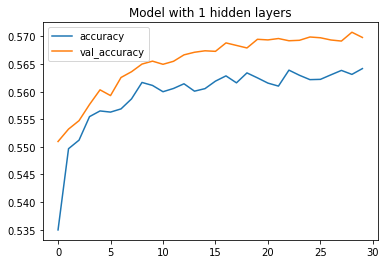

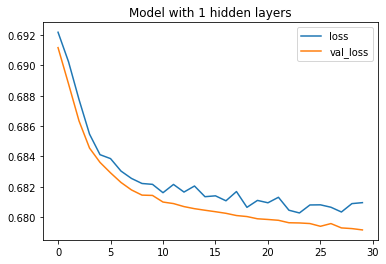

In [ ]:
i = 1

print(f"Training DAN with a WORD dropout layer and {i} hidden layers")
print()
model = DAN(i,False, True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAccWD:
  bestAccWD = acc

accuraciesWordDropout[i] = acc

Training DAN with a WORD dropout layer and 2 hidden layers

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, None, 300)         122693700 
                                                                 
 dropout_20 (Dropout)        (None, None, 300)         0         
                                                                 
 global_average_pooling1d_18  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_45 (Dense)            (None, 300)               90300     
                                                                 
 dense_46 (Dense)            (None, 300)               90300     
                                                                 
 dense_47 (Dense)            (None, 2)                 602 

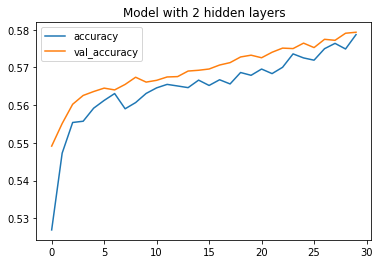

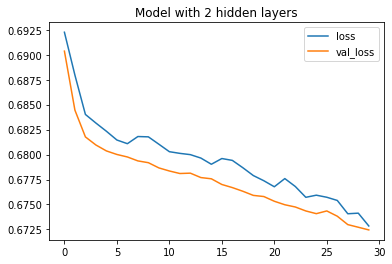

In [ ]:
i = 2

print(f"Training DAN with a WORD dropout layer and {i} hidden layers")
print()
model = DAN(i,False, True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAccWD:
  bestAccWD = acc

accuraciesWordDropout[i] = acc

Training DAN with a WORD dropout layer and 3 hidden layers

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 300)         122693700 
                                                                 
 dropout_21 (Dropout)        (None, None, 300)         0         
                                                                 
 global_average_pooling1d_19  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_48 (Dense)            (None, 300)               90300     
                                                                 
 dense_49 (Dense)            (None, 300)               90300     
                                                                 
 dense_50 (Dense)            (None, 300)               9030

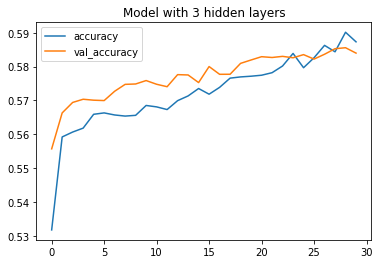

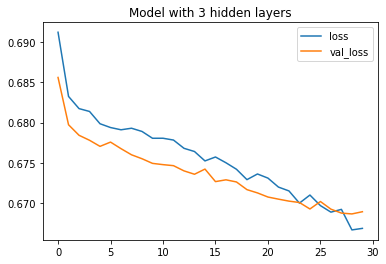

In [ ]:
i = 3

print(f"Training DAN with a WORD dropout layer and {i} hidden layers")
print()
model = DAN(i,False, True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAccWD:
  bestAccWD = acc

accuraciesWordDropout[i] = acc

Training DAN with a WORD dropout layer and 4 hidden layers

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, None, 300)         122693700 
                                                                 
 dropout_22 (Dropout)        (None, None, 300)         0         
                                                                 
 global_average_pooling1d_20  (None, 300)              0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_52 (Dense)            (None, 300)               90300     
                                                                 
 dense_53 (Dense)            (None, 300)               90300     
                                                                 
 dense_54 (Dense)            (None, 300)               9030

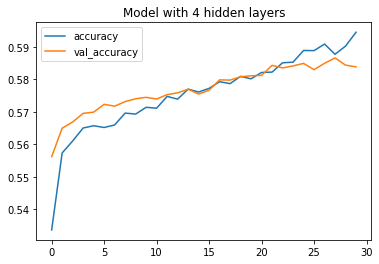

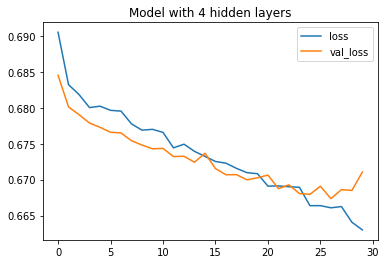

In [ ]:
i = 4

print(f"Training DAN with a WORD dropout layer and {i} hidden layers")
print()
model = DAN(i,False, True)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 
hist = model.fit(input, 
                  labels, 
                  epochs=30, 
                  batch_size = 500, 
                  shuffle = True, 
                  steps_per_epoch = 200, 
                  validation_split = 0.2,
                  verbose = 0)

df_dan = pd.DataFrame(hist.history)
df_dan[["accuracy", "val_accuracy"]].plot(title = f"Model with {i} hidden layers")
df_dan[["loss", "val_loss"]].plot(title = f"Model with {i} hidden layers")

loss, acc = model.evaluate(test_input, test_labels, verbose = 0)
print("The accuracy on the Testing Set is {0:10.4f}".format(acc))

if acc > bestAccWD:
  bestAccWD = acc

accuraciesWordDropout[i] = acc

In [ ]:
print("The best accuracy achieved is: {0:10.4f}".format(bestAccWD))

The best accuracy achieved is:     0.5767


By adding the word dropout layer, the results we get are quite different from the previous ones. This time, the model with less then 3 Dense layers performs better on the validation set in the first 30 epochs. 

In the model with 3 Dense layers, training and validation graphs get closer only after 15 epochs. 

The only model in which the training and testing validation and loss overlap for seval epochs is the one with 4 dense layers. However, the model rapidly starts overfitting the training set after the 20th epoch, when validation loss function starts increasing.

### 2.1.5 Compare Results

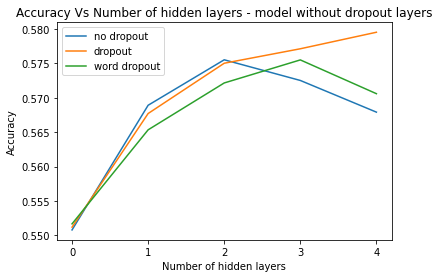

In [ ]:
keys1 = list(accuraciesNoDropout.keys())
values1 = list(accuraciesNoDropout.values())

keys2 = list(accuracies.keys())
values2 = list(accuracies.values())

keys3 = list(accuraciesWordDropout.keys())
values3 = list(accuraciesWordDropout.values())

plt.plot(keys1, values1, label = "no dropout")
plt.plot(keys2, values2, label = "dropout")
plt.plot(keys3, values3, label = "word dropout")

plt.legend()
plt.title('Accuracy Vs Number of hidden layers - model without dropout layers')
plt.xlabel('Number of hidden layers')
plt.ylabel('Accuracy')
plt.xticks(keys1)
# plt.yticks(values)

plt.show()

As the last analysis of this section, we compare the accuracy on the test set for different number of Dense layers in the three models. Interestingly, the three models reach their peaks for different values.

The model with no Dropout layer, which was inspired by Franco-Salvador et al,2017, has the same trend as the one reported in the paper: the best model has 2 hidden layers.

The model with a Word Dropout layer, inspired by Iyyer et al., 2015, reaches its maximum accuracy when it has 3 Dense layers, just like in the paper. 

Finally, for the model with Dropout layers, the accuracy grows with the number of Dense layers, reaching a global maximum of 57.95%. 

## 2.2. Convolutional Neural Networks

In this section we approached the problem with a Multi-channel CNN architecture, based on the work of (Schaetti, 2017) and (Kim, 2014)

Compared to traditional language processing methods such as recurrent neural networks, CNNs can reflect different contextual realities of speech that do not depend on a series-sequence assumption, whereas RNNs are better suited when classical time series modelling is required.

### 2.2.1 Multi-Channel Convolutional Neural Network with LSTM Architecture.

**1. Embeddings Layer**

Our model first consists of embedding layer in which we will find the embeddings of all the words into a 50 dimensional embedding. Since our model is based on a word-level CNN structure, we found the maximum length of a tweet in our datset to be 36 and hence used a 50 dimensional embedding to maintain uniformity across our input. 

**2. Convolutional Layer**

We then implement a CNN layer with 10 filters. The kernel size of 5 in the convolutional layer defines the number of words to consider as the convolution is passed across the input text document, providing a grouping parameter. The choice of activation function in this layer is ReLu, and we use L2 Regularizer to prevent overfitting.

**3. Dropout Layer**

Next, we add a dropout layer with $p = 0.4$ in each channel to reduce overfitting. We introduced a dropout layer after each channel instead of dropping out after the merged layer which was suggested by (Schaetti, 2017)

**4. BiDirectional LSTM Layer**

We implement a bidirectional layer to make our input from previous layers flow in two directions, making a bi-lstm different from the regular LSTM. With the regular LSTM, we can make input flow in one direction, either backwards or forward. However, in bi-directional, we can make the input flow in both directions to preserve the future and the past information from the next and previous layers. We implement a CuDNN LSTM layer instead of a standard one to speed up the training process, leveraging the GPUs full potential

**5. Dense Layer**

Finally, we implement 3 Dense Layers with 64, 32 and 2 neurons in each layer. The last layer is our output layer and has softmax activation function. The other two layers have sigmoid layer instead of ReLu as suggested by (Scahetti, 2017)

**6. Optimization**

We follow a similar optimization strategy as (Kim, 2014) with our loss function being binary_crossentropy, optimized with Adam optimizer

**7. Training**

For our training process, we split the training data into (85-15) training and validation split. We train for 10 epochs with a batch size of 1024

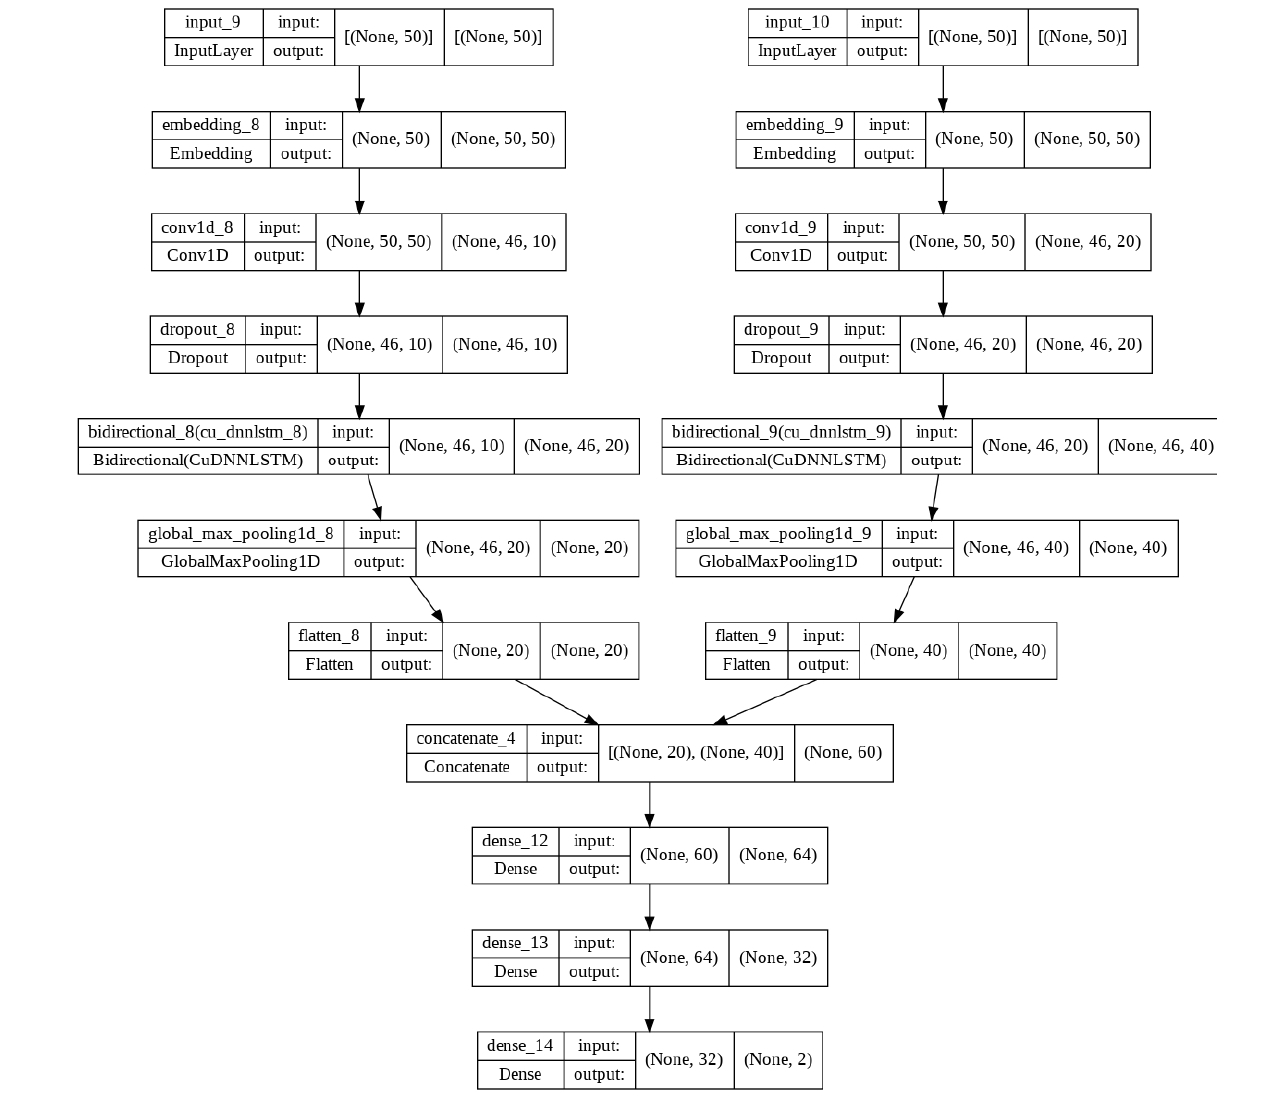

In [ ]:
df_multichannel = obtain_golden_dataset("en", "training")

In [ ]:
pipline_dataset(df_multichannel)
df_multichannel['tweet'] = df_multichannel['tweet'].apply(clean_texts)

In [ ]:
total_words_cnn, input_cnn_train, tokenizer_cnn = Tokenization(df_multichannel)

In [ ]:
def define_model(length, vocab_size): 
    # channel 1 
    inputs1 = Input(shape=(length,)) 
    embedding1 = Embedding(input_dim = vocab_size, output_dim = 50, mask_zero=True, embeddings_regularizer= regularizers.l2(0.0005))(inputs1)
    conv1 = Conv1D(filters=10, kernel_size=5, activation='relu',kernel_regularizer = regularizers.l2(0.0001),
                                 bias_regularizer = regularizers.l2(0.0001))(embedding1)
    drop1 = Dropout(0.4)(conv1)
    lstm1 = Bidirectional(CuDNNLSTM(10, return_sequences = True, kernel_initializer = "he_uniform"))(drop1)
    pool1 = GlobalMaxPooling1D()(lstm1)
    flat1 = Flatten()(pool1)
    
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(input_dim = vocab_size, output_dim = 50, embeddings_regularizer= regularizers.l2(0.0005))(inputs2)
    conv2 = Conv1D(filters=20, kernel_size=5, activation='relu',kernel_regularizer = regularizers.l2(0.0001),
                                 bias_regularizer = regularizers.l2(0.0001))(embedding2)
    drop2 = Dropout(0.4)(conv2)
    lstm2 = Bidirectional(CuDNNLSTM(20, return_sequences = True, kernel_initializer = "he_uniform"))(drop2)
    pool2 = GlobalMaxPooling1D()(lstm2)
    flat2 = Flatten()(pool2)
    
    # merge 
    merged = concatenate([flat1, flat2]) 
    # interpretation 
    dense1 = Dense(64, activation='sigmoid')(merged) 
    dense2 = Dense(32, activation='sigmoid')(dense1) 
    outputs = Dense(2, activation = 'softmax')(dense2)
    model = Model(inputs=[inputs1, inputs2], outputs=outputs) 
   
    # compile 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    # summarize 
    model.summary() 
    plot_model(model, show_shapes=True, to_file='multichannel_model.png') 
    return model

In [ ]:
model_cnn = define_model(50,total_words_cnn)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 50, 50)       20507700    ['input_5[0][0]']                
                                                                                                  
 embedding_5 (Embedding)        (None, 50, 50)       20507700    ['input_6[0][0]']                
                                                                                            

In [ ]:
train_labels = tf.keras.utils.to_categorical(df_multichannel.label.values)

In [ ]:
hist_cnn = model_cnn.fit([input_cnn_train,input_cnn_train], train_labels , epochs=10, batch_size = 1024 ,validation_split = 0.15)

Epoch 1/10
299/299 [==============================] - 32s 93ms/step - loss: 1.5226 - accuracy: 0.4983 - val_loss: 0.6933 - val_accuracy: 0.4955
Epoch 2/10
299/299 [==============================] - 27s 91ms/step - loss: 0.6940 - accuracy: 0.5134 - val_loss: 0.6982 - val_accuracy: 0.5704
Epoch 3/10
299/299 [==============================] - 27s 90ms/step - loss: 0.7220 - accuracy: 0.6111 - val_loss: 0.7369 - val_accuracy: 0.6527
Epoch 4/10
299/299 [==============================] - 27s 89ms/step - loss: 0.7525 - accuracy: 0.6664 - val_loss: 0.7502 - val_accuracy: 0.6841
Epoch 5/10
299/299 [==============================] - 27s 90ms/step - loss: 0.7536 - accuracy: 0.7043 - val_loss: 0.7568 - val_accuracy: 0.7107
Epoch 6/10
299/299 [==============================] - 27s 90ms/step - loss: 0.7662 - accuracy: 0.7492 - val_loss: 0.8160 - val_accuracy: 0.7225
Epoch 7/10
299/299 [==============================] - 27s 90ms/step - loss: 0.6886 - accuracy: 0.8277 - val_loss: 0.9094 - val_accuracy:

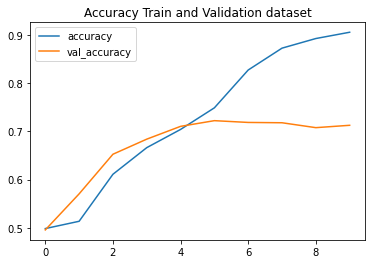

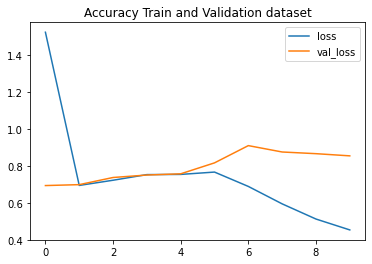

In [ ]:
df_cnn = pd.DataFrame(hist_cnn.history)
df_cnn[["accuracy", "val_accuracy"]].plot(title = "Accuracy Train and Validation dataset")
df_cnn[["loss", "val_loss"]].plot(title = "Accuracy Train and Validation dataset")

In [ ]:
df_test_cnn = obtain_golden_dataset("en", "test") #calling testing data

#Pass testing data through the same pipeline
pipline_dataset(df_test_cnn)
df_test_cnn['tweet'] = df_test_cnn['tweet'].apply(clean_texts)
input_cnn = tokenizer.texts_to_sequences(df_test_cnn.tweet)
input_cnn = tf.keras.preprocessing.sequence.pad_sequences(input_cnn, maxlen=50,padding="post",truncating="post")

In [ ]:
results_cnn = model_cnn.evaluate([input_cnn,input_cnn], 
            tf.keras.utils.to_categorical(df_test_cnn.label), batch_size = 1000)
print("test loss, test acc:", results_cnn)

240/240 [==============================] - 11s 37ms/step - loss: 1.1585 - accuracy: 0.5732
test loss, test acc: [1.158535122871399, 0.5732374787330627]


We see that the model achieves an accuracy of **57.32** percent, which is similar to the results from the Deep Average Neural network model. The model seems to overfit after 5 epochs and the results could be further improved by wokring with more hyperparameters.

## 2.3. Bidirectional Recurrent Neural Network With an Attention Mechanism


Another proposed solution for the classification of tweets to gender is the use of a Bidirectional Recurrent Neural Network Architecture with an Attention Mechanism which have had several successes in the recent years for Natural Language Processing.

 The basis and inspiration of the models are taken from the work from (Kodiyan et al, 2017).

There are two parts in the argument on why it is justified to use a Bidirectional Recurrent Neural Network Architecture. 

The first one is the fact that by using a recurring architecture with Long Short Term Memory cells we open the possibility of memory and this allow us to focus on certain aspects of the sequence.

The second,  The bidirectional aspect of the architecture helps the model to capture information from the previous cells and forward and allows more understanding of the grammatical structure of the tweet (Zhang et al, 2019).

Finally and as mentioned by the authors The Attention Mechanism " automatically weigh the most relevant information of the input sequence." (Kodiyan et al,2017)

### 2.3.1 Attention Mechanism and Bidirectional Recurrent Neural Network Architecture



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Embedding, Dense, Bidirectional
import numpy as np
import tensorflow as tf
from google.colab import drive, files
drive.mount('/content/drive')
path = 'drive/MyDrive/Project/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


As describe above, the Architecture and methodology are inspired by the work of (Kodiyan et al, 2017), with some changes that will be explained in the following sections:.

**1. Embeddings Layer**

The embedding layer receives a vector of word tokens of size $t \in \mathbb{R}^{n}$ where n is the biggest amount of words you can write in a tweet. Each word-token would be map, get concatenated with previous word-token and will be passed to the next layer. 

**2. LSTM Layer**  

Compared to (Kodiyan et al, 2017) we use two LSTM layers for the Bidirectional Recurrent Neural Network with 50 units each. The justification for the change is an LSTM performed better than a GRU. 


The result is a matrix $M \in \mathbb{R}^{100 x n}$. 


**3. Attention Layer**

Taking the ouput matrix of the last layer $M$ we do the following computations:
1. $h_t = tanh( W_1M+b)$
2. $a = W_2h_t+b$

The output is $a*M$ which has dimension 100. The main pourpose of the attention mechanism is to focus on relevant information in the sequence.
An innovation in this layer is the change from scores (variable a) that are generated with a softmax activation function to one generated without activation function. The justification of this decision was an improvement in accuracy of approximatley 5% points.

**4. Dropout**

We add a dropout layer with $p = .2$ to control overfitting.

**4. Softmax Layer**

The final layer is a Dense layer with activation function softmax that outputs a two dimensional vector that represent the probability of being male or female respectivley.


**5. Optimization** 

Instead of using AdaDelta as (Kodiyan et al, 2017) we implement ADAM optimizer with learning rate = .001, which achieves better results in this exercise.

**6. Training** 

We split the database 80% training, 20% validation dataset and perform 50 epochs with a batch size of 1000 and 5 steps per epoch to avoid overfitting



### 2.3.2 Attention Mechanism + BiRNN Code

In [ ]:


class Attention(tf.keras.layers.Layer):

  def __init__(self, input_dim):
      super(Attention, self).__init__()
      
      self.w = Dense(100, activation = "tanh", dtype="float32")
      

      self.w_u = Dense(input_dim,  dtype="float32")     

  def call(self, inputs):
      hidden = self.w(inputs)
      tf.keras.layers.Dropout(.2)
      scores = self.w_u(hidden) 
      
      return tf.math.multiply(scores,inputs)

Total words:  408979
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 50)          20448950  
                                                                 
 bidirectional_2 (Bidirectio  (None, 100)              40400     
 nal)                                                            
                                                                 
 attention_2 (Attention)     (None, 100)               20200     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 2)                 202       
                                                                 
Total params: 20,509,752
Trainable params: 20,509,752
Non-trainable params: 0
_____________________

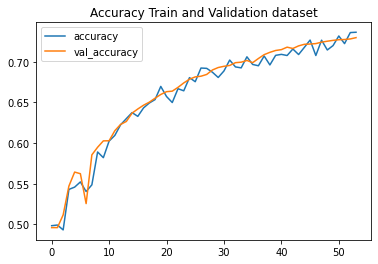

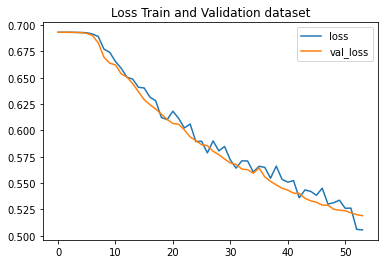

In [ ]:



model_bid = tf.keras.Sequential([
                              
    tf.keras.layers.Embedding(
        input_dim=total_words,
        output_dim=50,
        mask_zero=True),

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),

    Attention(100),  

    tf.keras.layers.Dropout(.2),

    tf.keras.layers.Dense(2, activation = "softmax")
])

model_bid.summary()

model_bid.compile(optimizer="adam"
,loss=tf.keras.losses.CategoricalCrossentropy(
    name='categorical_crossentropy'
), metrics="accuracy")

hist = model_bid.fit(training_input, 
          labels), 
          epochs = 54, 
          validation_split = 0.2,
          batch_size= 1000, shuffle = True, steps_per_epoch= 5, verbose = 0)


df_h = pd.DataFrame(hist.history)
df_h[["accuracy", "val_accuracy"]].plot(title = "Accuracy Training and Validation dataset")
df_h[["loss", "val_loss"]].plot(title = "Loss Training and Validation dataset")

In [ ]:
results = model_bid.evaluate(test_input, 
            test_labels, batch_size = 1000)
print("test loss, test acc:", results)

240/240 [==============================] - 4s 17ms/step - loss: 0.6938 - accuracy: 0.6158
test loss, test acc: [0.6938468813896179, 0.6157666444778442]


**Results Analysis**

The model has a good learning performance from epoch 0 and epoch 25 and starts to increase in a decreasing rate for the rest of the epochs. Nonetheless, in the loss and accuracy graphs for the training and validation datasets there is not sign of overfitting. The result for this datasets is approximately 73%.

Unfortunatley, when the model is evaluated in the test dataset the accuracy and loss metrics show a worse performance: 69.38% in the loss and 61.58% for the accuracy. A conclusion for these results is that the model is not generalizing well for other datasets and the learning after 69% does not provide predictability.

# 3. Conclusion

As expected with the competition result, none of the Deep Learning models implemented in this paper provide a high accuracy in the test dataset. 
The best result among the three models comes from the Bidirectional Recurrent Neural Network with an Attention Mechanism and we argue this happen because of the architecture that provides the model to focus on more specific parts of the encoded input. 

| Model   |      English test dataset   |  
|----------|:-------------:|
| Deep Averaging Network with 4 Dense Layers and 4 Dropout Layers| 57.95 | 
|Multichannel CNN Model with LSTM| 57.32|
| Attention Mechanism and Bidirectional Recurrent Neural Network |  61.57 | 



# References

- Zhang, Aston, et al. 2021, Dive into Deep Learning, https://d2l.ai/index.html#. 
- Kodiyan, Don, et al. “Author Profiling with Bidirectional RNNs Using Attention with GRUs” CLEF 2017 Conference and Labs of the Evaluation Forum, Dublin, Ireland, 11-14 September 2017, 2017, 10.21256/zhaw-1531 
-Iyyer, M., Manjunatha, V., Boyd-Graber, J. and Daumé III, H., 2015, July. Deep unordered composition rivals syntactic methods for text classification. In Proceedings of the 53rd annual meeting of the association for computational linguistics and the 7th international joint conference on natural language processing (volume 1: Long papers) (pp. 1681-1691).
-Franco-Salvador, M., Plotnikova, N., Pawar, N. and Benajiba, Y., 2017. Subword-based Deep Averaging Networks for Author Profiling in Social Media. In CLEF (Working notes).
- Shannon, Claude E. “A Mathematical Theory of Communication.” The Bell System Technical Journal, vol. 27, July 1948, https://doi.org/10.1109/9780470544242.ch1. 
- Rangel, F., Rosso, P., Potthast, M. and Stein, B., 2017. Overview of the 5th author profiling task at pan 2017: Gender and language variety identification in twitter. Working notes papers of the CLEF, pp.1613-0073.
- Schaetti, N., 2017. UniNE at CLEF 2017: TF-IDF and Deep-Learning for
Author Profiling ,Notebook for PAN at CLEF 2017
- Kim, Y.,2014. Convolutional Neural Networks for Sentence Classification, https://aclanthology.org/D14-1181


# Statement about individual contributions

#### Candidate number: 39719
- Model Developed: Multichannel CNN with LSTM 
- Dataset Description

#### Candidate number: 35387
- Model Developed: Deep Averaging Network
-Introduction
-Data Pre-Processing notebook)

#### Candidate number: 27767
- Model Developed: Bidirection Recurrent Neural Network and an Attention Mechanism
- Problem Description and Analysis
- Training Dataset Analysis
